In [1]:
import torch
import matplotlib.pyplot as plt

In [3]:
# 网络结构有两种方式，逐步探索

# 构建数据
torch.manual_seed(1)

# 假数据
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [15]:
# 使用Sequential 构建网络结构
def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.2)
    loss_func = torch.nn.MSELoss()
    
    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # plot result
    plt.figure(1,figsize=(10,3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
    
    # 有两种途径保存模型
    # 1.保存整个网络
    torch.save(net1,'./model/net.pkl')
    # 2.只保存网络中的参数
    torch.save(net1.state_dict(),'./model/net_parameters.pkl')

In [16]:
# 恢复整个网络
def restore_net():
    net2 = torch.load('./model/net.pkl')
    prediction = net2(x)
    
    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)

In [17]:
# 恢复网络参数
def restore_parameters():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    
    # copy net1 parameters to net3
    net3.load_state_dict(torch.load('./model/net_parameters.pkl'))
    prediction = net3(x)
    
    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
    plt.show()

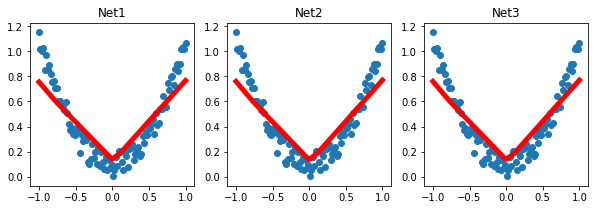

In [18]:
save()
restore_net()
restore_parameters()